<a href="https://colab.research.google.com/github/AnshSharma16/Machine-learning-regression-with-Python/blob/main/YearsExperience_vs_Salary_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and checking the null values

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Salary_dataset.csv")
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))
print(df)


Saving Salary_dataset.csv to Salary_dataset (3).csv
YearsExperience    0.0
Salary             0.0
dtype: float64
    YearsExperience  Salary
0               1.2   39344
1               1.4   46206
2               1.6   37732
3               2.1   43526
4               2.3   39892
5               3.0   56643
6               3.1   60151
7               3.3   54446
8               3.3   64446
9               3.8   57190
10              4.0   63219
11              4.1   55795
12              4.1   56958
13              4.2   57082
14              4.6   61112
15              5.0   67939
16              5.2   66030
17              5.4   83089
18              6.0   81364
19              6.1   93941
20              6.9   91739
21              7.2   98274
22              8.0  101303
23              8.3  113813
24              8.8  109432
25              9.1  105583
26              9.6  116970
27              9.7  112636
28             10.4  122392
29             10.6  121873


Checking outliers by box plot

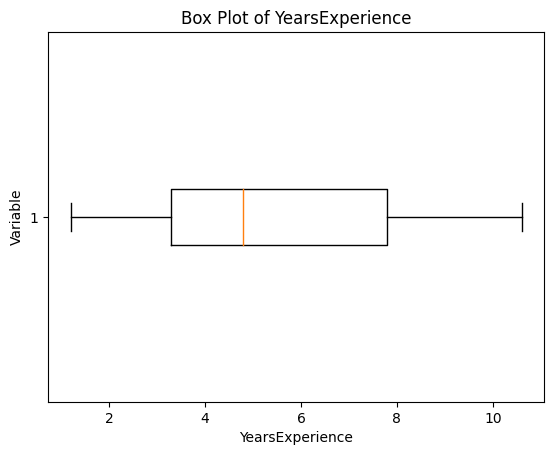

In [ ]:
plt.boxplot(df['YearsExperience'], vert=False)
plt.xlabel('YearsExperience')
plt.ylabel('Variable')
plt.title('Box Plot of YearsExperience')
plt.show()

Bar graph

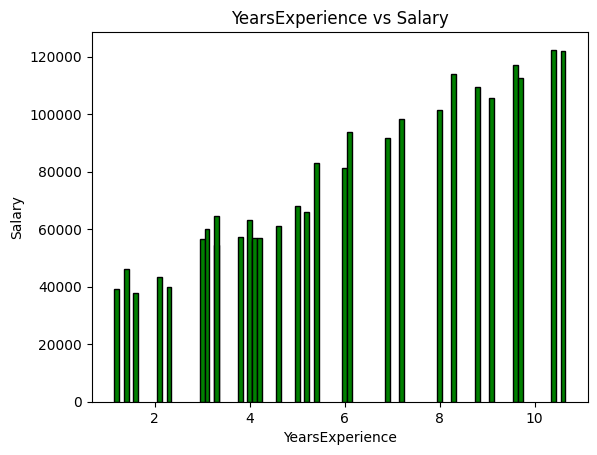

In [ ]:

# Create a bar plot for YearsExperience vs Salary
plt.bar(df["YearsExperience"], df["Salary"],width=0.1, edgecolor='black', color='green')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()


Feature Scaling using Maximum Absolute method

In [ ]:
max_vals=np.max(np.abs(df))
df=(df-max_vals)/max_vals
print(df)


    YearsExperience    Salary
0         -0.999990 -0.678541
1         -0.999989 -0.622475
2         -0.999987 -0.691712
3         -0.999983 -0.644372
4         -0.999981 -0.674064
5         -0.999975 -0.537200
6         -0.999975 -0.508538
7         -0.999973 -0.555151
8         -0.999973 -0.473446
9         -0.999969 -0.532731
10        -0.999967 -0.483471
11        -0.999967 -0.544129
12        -0.999967 -0.534626
13        -0.999966 -0.533613
14        -0.999962 -0.500686
15        -0.999959 -0.444907
16        -0.999958 -0.460504
17        -0.999956 -0.321124
18        -0.999951 -0.335218
19        -0.999950 -0.232458
20        -0.999944 -0.250449
21        -0.999941 -0.197055
22        -0.999935 -0.172307
23        -0.999932 -0.070094
24        -0.999928 -0.105889
25        -0.999926 -0.137337
26        -0.999922 -0.044300
27        -0.999921 -0.079711
28        -0.999915  0.000000
29        -0.999913 -0.004240


Model selection and Evaluation metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print("Root Mean Squared Error:",rmse)
print("Mean Squared Error: ",mse)
print("R-squared:",r2)
print(f"Model Accuracy: {regressor.score(x_test,y_test) * 100:.2f}%")

Root Mean Squared Error: 0.053667584894349626
Mean Squared Error:  0.002880209668392224
R-squared: 0.9400870162548599
Model Accuracy: 94.01%


Regression Line plotting

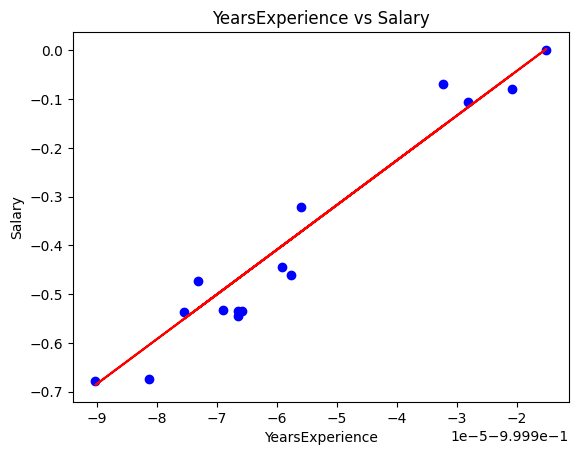

In [ ]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()